In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

In [208]:
from skimage import data
coins = data.coins()
coins.shape

(303, 384)

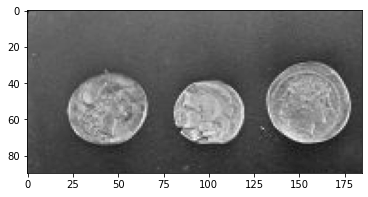

In [214]:
plt.imshow(coins[0:90,0:185],cmap='gray')
coins = coins[0:90,0:185]

In [4]:
from skimage.transform import resize

In [229]:
s = 5
image = resize(coins, (coins.shape[0]//s, coins.shape[1]//s))

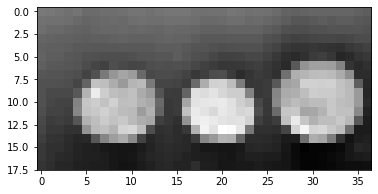

In [230]:
plt.imshow(image,cmap='gray')

In [231]:
hight, width = image.shape
hight,width

(18, 37)

In [232]:
X = image.reshape(-1,1)
X.shape[0]

666

In [233]:
X[2,0],image[0,2]

(0.5137254901960784, 0.5137254901960784)

In [234]:
m =hight*width
m

666

In [235]:
# distances
D = pairwise_distances(X)
D.shape

(666, 666)

In [249]:
def pixel_to_row(i,j):
    return i*width+j

In [255]:
i,j=3,15
image[i,j], X[pixel_to_row(i,j)]

(0.4823529411764706, array([0.48235294]))

In [253]:
pixel_to_row(0,1)

1

In [238]:
D.shape

(666, 666)

In [281]:
dist = np.inf*np.ones(D.shape)
#dist = np.zeros(D.shape)
for i in range(hight):
    for j in range(width):
        # (i,j+1)
        if j<width-1:
            dist[pixel_to_row(i,j),pixel_to_row(i,j+1)] =  D[pixel_to_row(i,j),pixel_to_row(i,j+1)]
        # (i,j-1)
        if j>1:
            dist[pixel_to_row(i,j),pixel_to_row(i,j-1)] =  D[pixel_to_row(i,j),pixel_to_row(i,j-1)]
        # (i+1,j)
        if i<hight-1:
            dist[pixel_to_row(i,j),pixel_to_row(i+1,j)] =  D[pixel_to_row(i,j),pixel_to_row(i+1,j)]
        # (i-1,j)
        if i>1:
            dist[pixel_to_row(i,j),pixel_to_row(i-1,j)] =  D[pixel_to_row(i,j),pixel_to_row(i-1,j)]

In [282]:
n_clusters=4

In [283]:
# Make each point its own cluster of one
k = m 
clusters = np.arange(k)

# hierarchical clustering iteration'
while k>n_clusters:  
    if k % 100 ==0:
        print(k)
    # find closest clusters
    i, j = np.unravel_index(np.argmin(dist),(k,k))
    i,j = np.sort([i,j]) # reorder the pair (i,j) so that  j>i

    # merge clusters
    clusters[clusters==j]=i

    # rename clusters
    clusters[clusters>j] -= 1

    # recompute distance from the new cluster i to the remaining clusters'
    dist[i] = np.minimum(dist[i],dist[j]) # 
    dist[:,i] = dist[i] # distance_clusters matrix is symmetric
    dist[i,i]= np.inf # set the distance from cluster i to itself to infinity

    # remove row j and column j from distance_clusters matrix
    dist = np.delete(dist,j,0) # remove row j
    dist = np.delete(dist,j,1) # remove column j


    # reduce number of clusters
    k = k-1


600
500
400
300
200
100


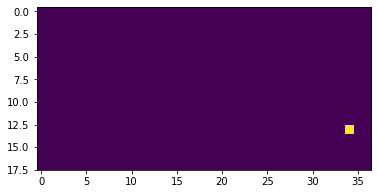

In [287]:
i=2
X_seg = np.zeros(X.shape)
X_seg[clusters==i,0]=1
plt.imshow(X_seg.reshape(hight,width))

In [248]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,